This jupyter notebook and the associated gradient descent class do linear regression using the gradient descent method.

In [9]:
import sys
import os

import matplotlib.pyplot as plt
from matplotlib import cm

import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

In [10]:
# Get the absolute path of the current file
try:
    # Works in .py scripts
    current_dir = os.path.dirname(os.path.abspath(__file__))
except NameError:
    # Fallback for Jupyter
    current_dir = os.getcwd()

# Go up N levels (here N=2, but you can adjust)
# project_root = os.path.abspath(os.path.join(current_dir, "..", ".."))
project_root = os.path.abspath(os.path.join(current_dir, ".."))

# Add the project root to sys.path if not already there
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [11]:
from ML_toolbox import d_lm_analytical_solution_class
from ML_toolbox import d_mlr_gradient_descent_class

In [12]:
# specify parameters for gradient descent
delta_J_threshold = 0.000001
learning_rate = 0.001

In [13]:
in_file_name = "../../data/linear_regression_test_data.csv"
data_in_df = pd.read_csv(in_file_name)
data_in_df.head()

,x,y,y_theoretical
0,-1.919126,2.420126,2.121310
1,-1.715856,2.385185,2.426216
2,-1.651483,2.585389,2.522776
3,-0.466234,4.129830,4.300649
4,-0.305381,4.031331,4.541929


In [14]:
# x_name = ['size', 'number of bedrooms']
x_name = ['x']
y_name = ['y']

variable_to_plot = ['x']

Text(0, 0.5, 'y')

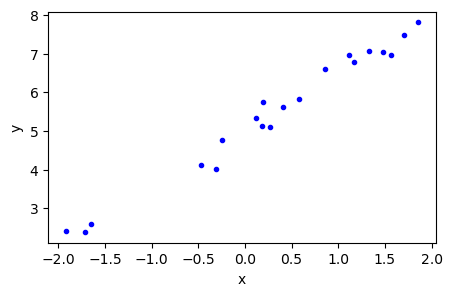

In [15]:
fig, ax = plt.subplots(figsize=(5,3))
ax.scatter(data_in_df[variable_to_plot], data_in_df[y_name], marker='.', color='blue')
ax.set_xlabel(variable_to_plot[0])
ax.set_ylabel(y_name[0])

In [16]:
# normalize variables to make them have similar scale
standard_scaler_obj = StandardScaler()
standard_scaler_obj.fit(data_in_df[x_name + y_name])

mean_needed_df = pd.Series(standard_scaler_obj.mean_, index=x_name + y_name)
scale_needed_df = pd.Series(standard_scaler_obj.scale_, index=x_name + y_name)

data_normalized_df = pd.DataFrame(standard_scaler_obj.transform(data_in_df[x_name+y_name]), \
                                  index=data_in_df.index, \
                                  columns=x_name + y_name)

In [17]:
# get information on x (single variable) and y
X = data_normalized_df[x_name]
y = data_normalized_df[y_name]

# augment X0
X = sm.add_constant(X)

number_of_variables = X.shape[1]

 # including X0
initial_theta = np.zeros((number_of_variables, 1))

In [18]:
delta_J_threshold
initial_theta
learning_rate

0.001

In [19]:
# gradient descent
obj_MLR = d_mlr_gradient_descent_class.MLR(delta_J_threshold=delta_J_threshold,
                                               initial_theta=initial_theta,
                                               learning_rate=learning_rate)

obj_MLR.fit(X=X, y=y)
optimal_theta = obj_MLR.optimal_theta
J = obj_MLR.J

Text(0, 0.5, 'J')

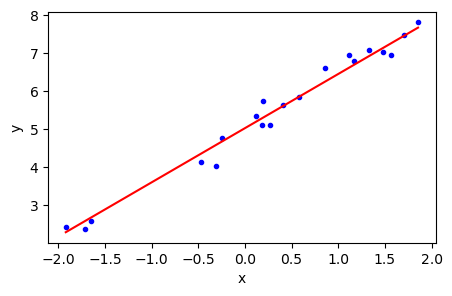

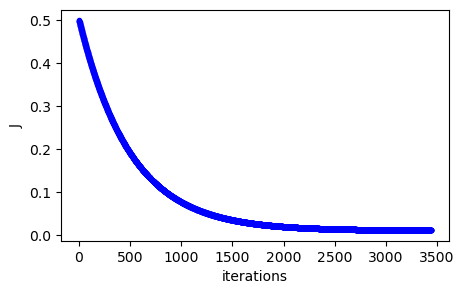

In [20]:
y_hat = X @ optimal_theta

# restore y_hat to the original data space
y_hat_restored = y_hat * scale_needed_df[y_name][y_name].values + mean_needed_df[y_name].values


fig, ax = plt.subplots(figsize=(5,3))
ax.scatter(data_in_df[variable_to_plot], data_in_df[y_name], marker='.', color='blue')
ax.plot(data_in_df[variable_to_plot], y_hat_restored, color='red')
ax.set_xlabel(variable_to_plot[0])
ax.set_ylabel(y_name[0])


fig, ax = plt.subplots(figsize=(5,3))
ax.scatter(range(len(J)), J, marker='.', color='blue')
ax.set_xlabel('iterations')
ax.set_ylabel('J')